## 8. Model Diagnostics

**Exercise 8.1**.  For an AR(1) model with $\phi \approx 0.5$ and $n = 100$, the lag 1 sample autocorrelation of the residuals is 0.5.  Should we consider this unusual?  Why or why not?

**Solution**.  From Equation (8.1.5),

$$ \text{Var}[\hat{r}_1] \approx \frac{\phi^2}{n} $$

so the standard error of the sample correlation to be approximately 0.05, and we should expect the lag 1 sample autocorrelation to be within 2 standard errors, $\pm 0.1$.  A value of 0.5 is unusual.

**Exercise 8.2**.  Repeat Exercise 8.1 for an MA(1) model with $\theta \approx 0.5$ and and $n = 100$.

**Solution**.  Page 183 indicates that we can replace $\phi$ with $\theta$ for MA(1) models, so

$$ \text{Var}[\hat{r}_1] \approx \frac{\theta^2}{n} $$

Once again the standard error of the sample correlation is approximately 0.05, and we should expect the lag 1 sample autocorrelation to be within 2 standard errors, $\pm 0.1$.  A value of 0.5 is unusual.

**Exercise 8.3**.  Based on a series of length $n = 200$, we fit an AR(2) model and obtain residual autocorrelations of $\hat{r}_1 = 0.13$, $\hat{r}_2 = 0.13$, and $\hat{r}_3 = 0.12$.  If $\hat{\phi}_1 = 1.1$ and $\hat{\phi}_2 = −0.8$, do these residual autocorrelations support the AR(2) specification?  Individually  Jointly?

**Solution**.  Equations (8.1.8), (8.1.9) and (8.1.10) state that, for the AR(2) model,

$$
\text{Var}[\hat{r}_1] \approx \frac{\phi_2^2}{n},
\quad
\text{Var}[\hat{r}_2] \approx \frac{\phi_2^2 + \phi_1^2(1 + \phi_2)^2}{n},
\quad
\text{Var}[\hat{r}_k] \approx \frac{1}{n} \quad \text{for } k \geq 3
$$

Replacing in the given values, we get

$$
2 \sqrt{\text{Var}[\hat{r}_1]} \approx 0.113,
\quad
2 \sqrt{\text{Var}[\hat{r}_2]} \approx 0.117,
\quad
2 \sqrt{\text{Var}[\hat{r}_k]} \approx 0.141 \quad \text{for } k \geq 3
$$

The residual autocorrelations for $\hat{r}_1$ and $\hat{r}_2$ are above those thresholds, while the residual autocorrelation for $\hat{r}_3$ is under the corresponding threshold.

The Ljung-Box statistic is

$$ Q_* = n(n+2) \left( \frac{\hat{r}_1^2}{n - 1} + \frac{\hat{r}_2^2}{n - 2} + \frac{\hat{r}_3^2}{n - 3} \right) $$

which, replacing values, gives $Q_* \approx 9.832$.  If the AR(2) speficication is correct, then $Q_*$ should have approximately a chi-square distribution with 3 - 2 = 1 degree of freedom.  But $\text{Pr}[\chi_1^2 > Q_*] \approx 0.0017$, so the residual correlations are jointly too large to support the AR(2) specification at p-value 0.01.

In [1]:
n = 200
r1 = 0.13
r2 = 0.13
r3 = 0.12
Qstar = n * (n + 2) * (r1**2/(n-1) + r2**2/(n-2) + r3**2/(n-3))
print(Qstar)

[1] 9.832334


In [2]:
print(1 - pchisq(Qstar, df=1))

[1] 0.001714706


**Exercise 8.4**.  Simulate an AR(1) model with $n = 30$ and $\phi = 0.5$.

**(a)** Fit the correctly specified AR(1) model and look at a time series plot of the residuals.  Does the plot support the AR(1) specification?

**(b)** Display a normal quantile-quantile plot of the standardized residuals.  Does the plot support the AR(1) specification?

**(c)** Display the sample ACF of the residuals.  Does the plot support the AR(1) specification?

**(d)** Calculate the Ljung-Box statistic summing to $K = 8$.  Does this statistic support the AR(1) specification?

**Solution**.

In [3]:
set.seed(1000)
Y = arima.sim(model=list(ar=0.5), n=30)

**(a)**

In [4]:
model = arima(Y, order=c(1,0,0), method='ML')

In [5]:
require(ggplot2)
require(latex2exp)

Loading required package: ggplot2

Loading required package: latex2exp



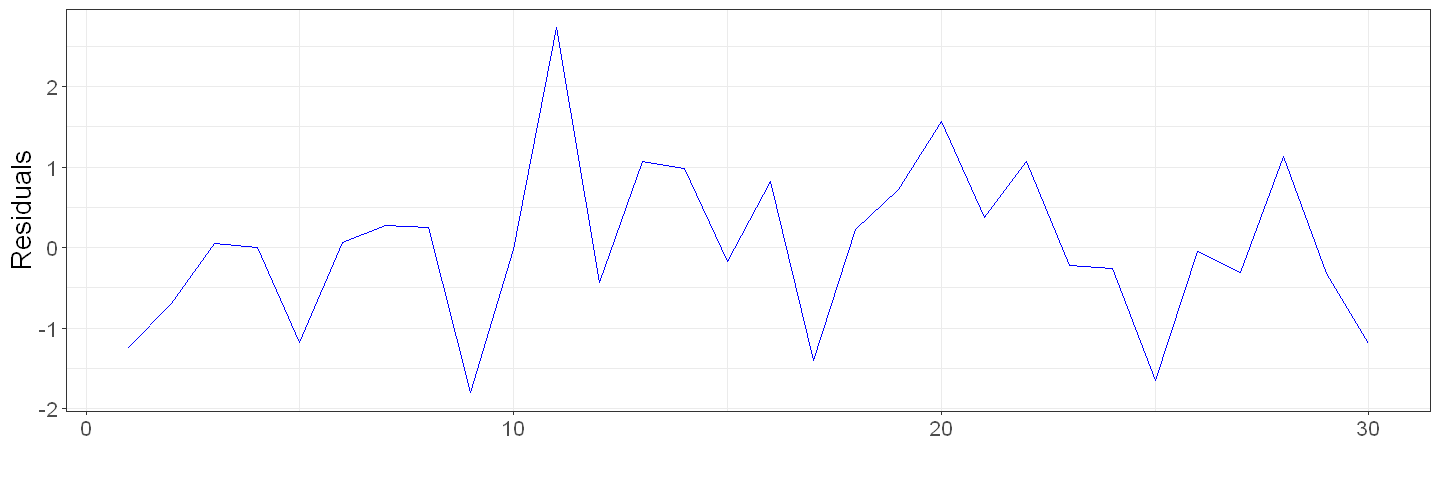

In [6]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() + 
  geom_line(aes(x=1:length(Y), y=c(model$resid)), color='blue', na.rm=T) +
  xlab('') + ylab('Residuals') +
  theme_bw() + theme(text = element_text(size=16))

Residuals look random.

**(b)**

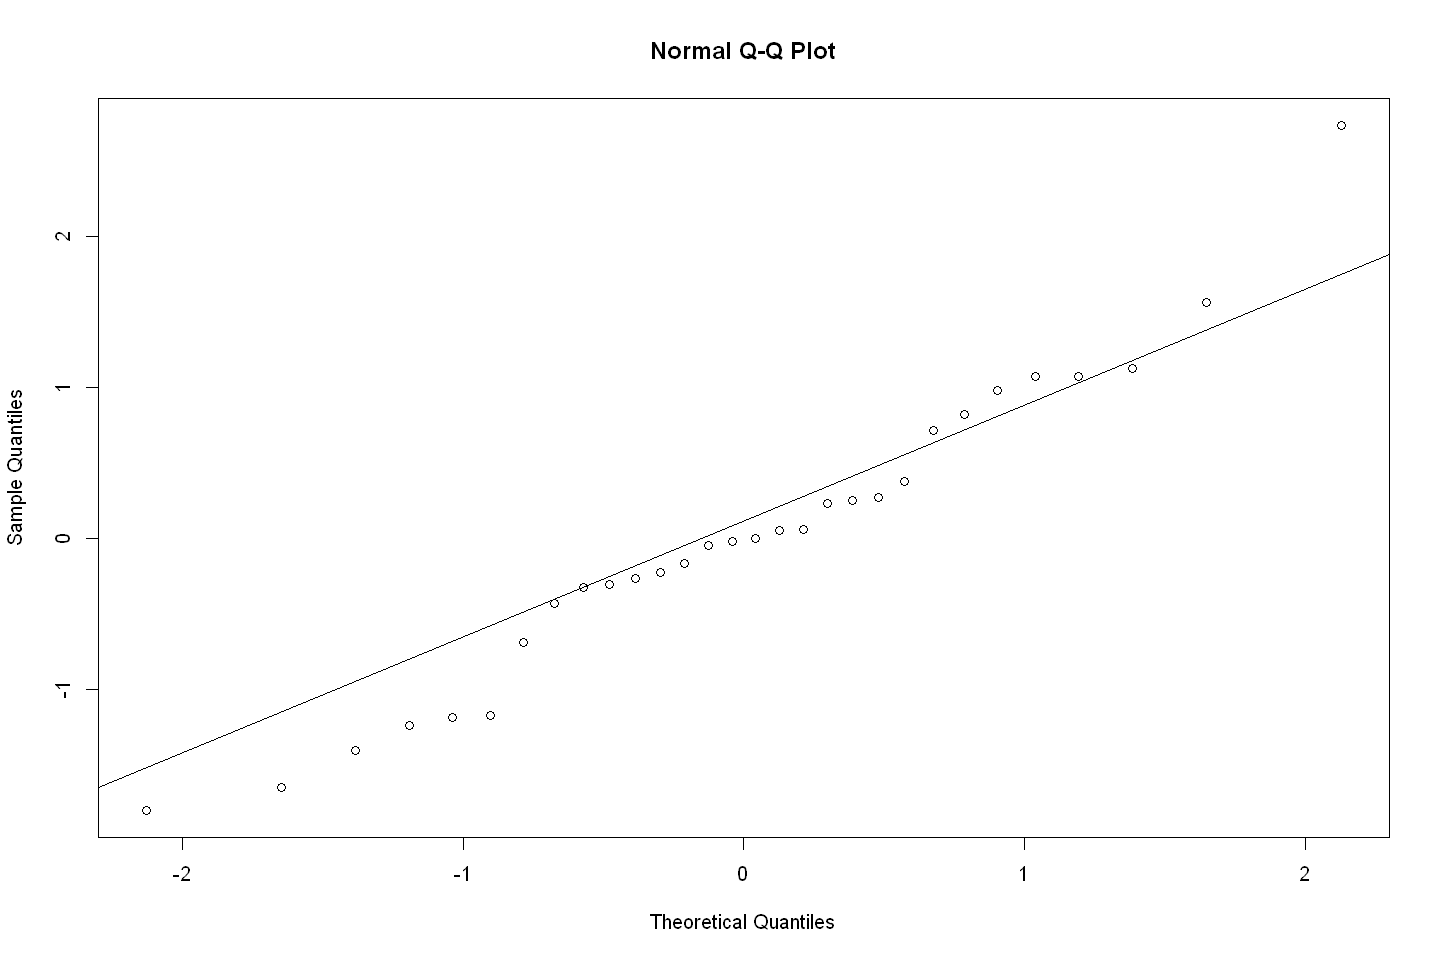

In [7]:
options(repr.plot.width=12, repr.plot.height=8)
qqnorm(model$resid); qqline(model$resid)

Tails look suspect on both ends.  Let's do Shapiro-Wilk to verify normality:

In [8]:
shapiro.test(model$resid)


	Shapiro-Wilk normality test

data:  model$resid
W = 0.96858, p-value = 0.5011


The test fails to reject normality.

**(c)**

In [9]:
plot_acf_with_bounds <- function(acf, lower, upper, title='ACF') {
    max_k = length(acf)
    k = seq(1, max_k)
    
    options(repr.plot.width=12, repr.plot.height=4)
    p = ggplot() + geom_ribbon(aes(x=k, ymin=lower, ymax=upper), fill='blue', alpha=0.1) +
        geom_point(aes(x=k, y=acf), color='blue')
    for (i in 1:max_k) {
        p = p + geom_line(aes_string(x=k[i], y=c(0, acf[i])), color='blue')
    }
    p + geom_line(aes(x=k, y=0), color='blue', linetype='dashed') +
        xlab('Lag') + ylab(TeX('$\\rho_k$')) +
        ggtitle(title) +
        theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))
}

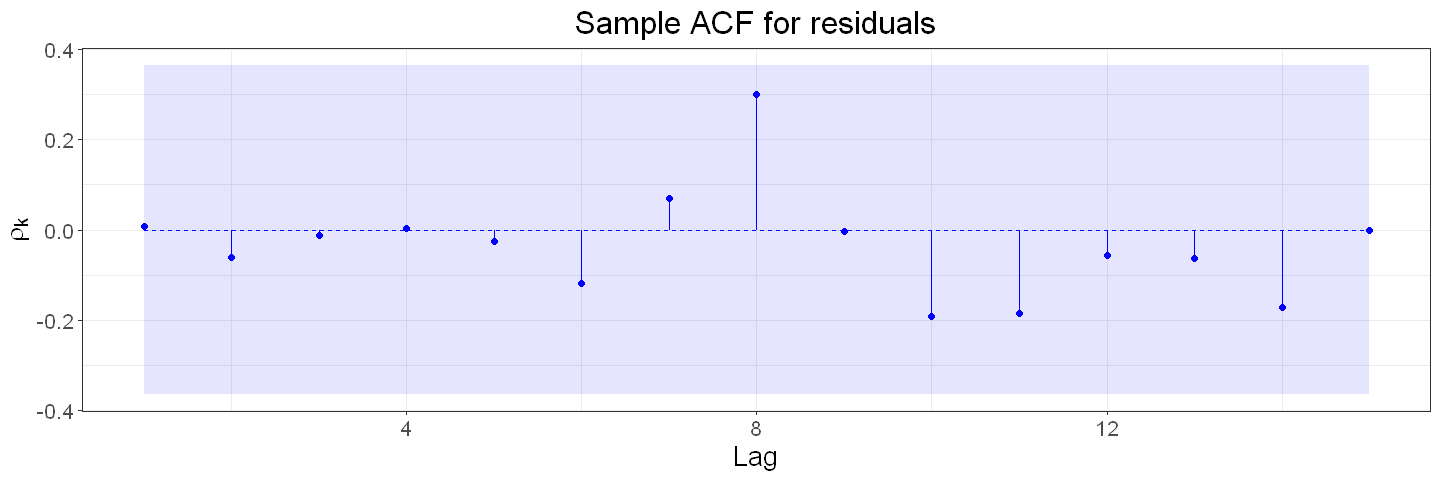

In [10]:
r = acf(model$resid, lag.max=15, plot=F)$acf[-1]
se = 1 / sqrt(length(Y))
plot_acf_with_bounds(r, - 2 * se, + 2*se, title='Sample ACF for residuals')

ACF indicates residuals are random.

**(d)**

In [11]:
ljung.box.test <- function(r, n, k_ar=0, k_ma=0) {
    nlags = length(r)
    denominators = (n-1):(n-nlags)
    Qstar = n * (n-2) * sum(r**2 / denominators)
    df = nlags - k_ar - k_ma
    p_value = 1 - pchisq(Qstar, df=df)
    
    list('X-squared'=Qstar, df=df, 'p-value'=p_value)
}

In [12]:
ljung.box.test(acf(model$resid, lag.max=8, plot=F)$acf[-1], n=length(Y), k_ar=1)

$`X-squared`
[1] 4.27916

$df
[1] 7

$`p-value`
[1] 0.7471206

The test does not reject randomness of error based on the first 8 autocorrelations.

**Exercise 8.5**. Simulate an MA(1) model with $n = 36$ and $\theta = −0.5$.

**(a)** Fit the correctly specified MA(1) model and look at a time series plot of the residuals.  Does the plot support the MA(1) specification?

**(b)** Display a normal quantile-quantile plot of the standardized residuals.  Does the plot support the MA(1) specification?

**(c)** Display the sample ACF of the residuals.  Does the plot support the MA(1) specification?

**(d)** Calculate the Ljung-Box statistic summing to K = 6.  Does this statistic support the MA(1) specification?

**Solution**.

In [13]:
set.seed(2000)
Y = arima.sim(model=list(ma=-0.5), n=36)

**(a)**

In [14]:
model = arima(Y, order=c(0,0,1), method='ML')

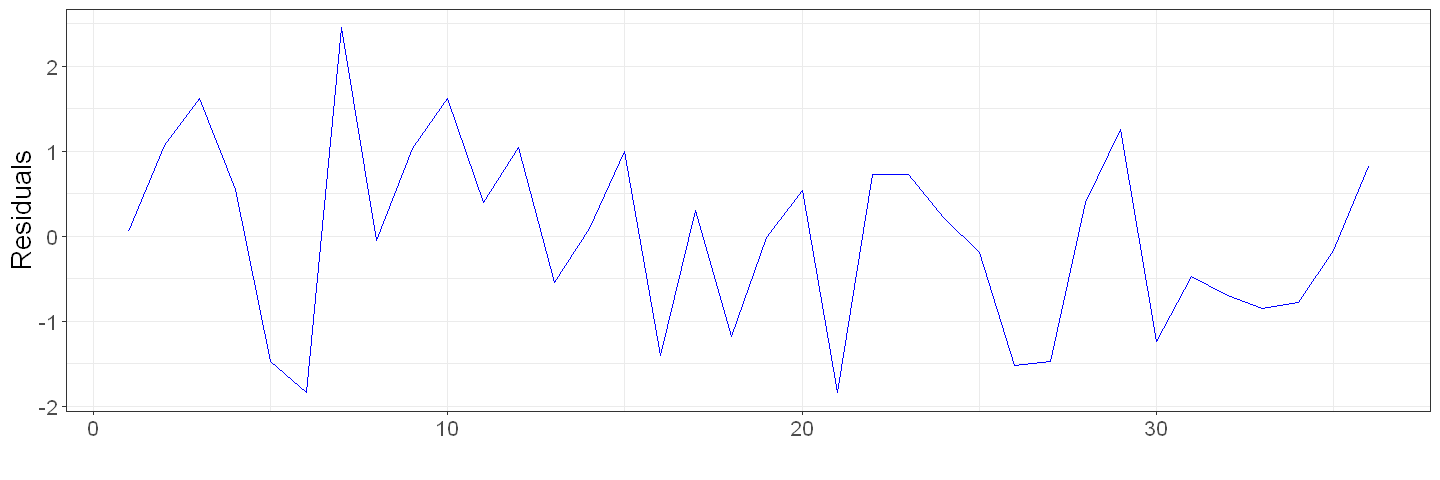

In [15]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() + 
  geom_line(aes(x=1:length(Y), y=c(model$resid)), color='blue', na.rm=T) +
  xlab('') + ylab('Residuals') +
  theme_bw() + theme(text = element_text(size=16))

Residuals look random.

**(b)**

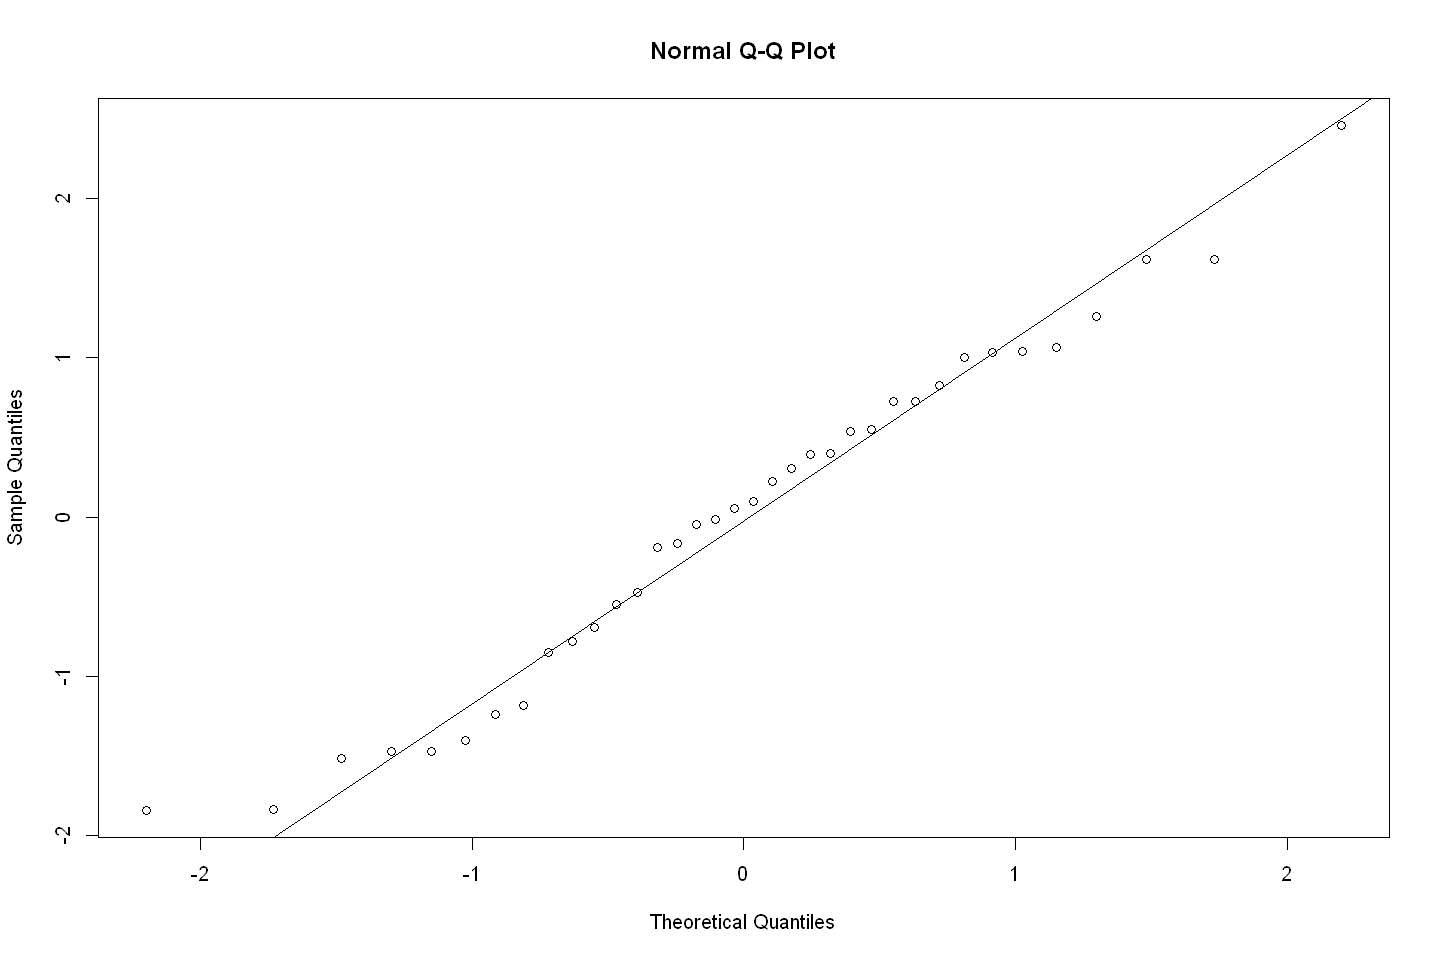

In [16]:
options(repr.plot.width=12, repr.plot.height=8)
qqnorm(model$resid); qqline(model$resid)

The residuals look normal, except maybe for the first point in the lower tail.  Let's do a Shapiro-Wilk test anyhow:

In [17]:
shapiro.test(model$resid)


	Shapiro-Wilk normality test

data:  model$resid
W = 0.97292, p-value = 0.5105


The Shapiro-Wilk test fails to reject normality.

**(c)**

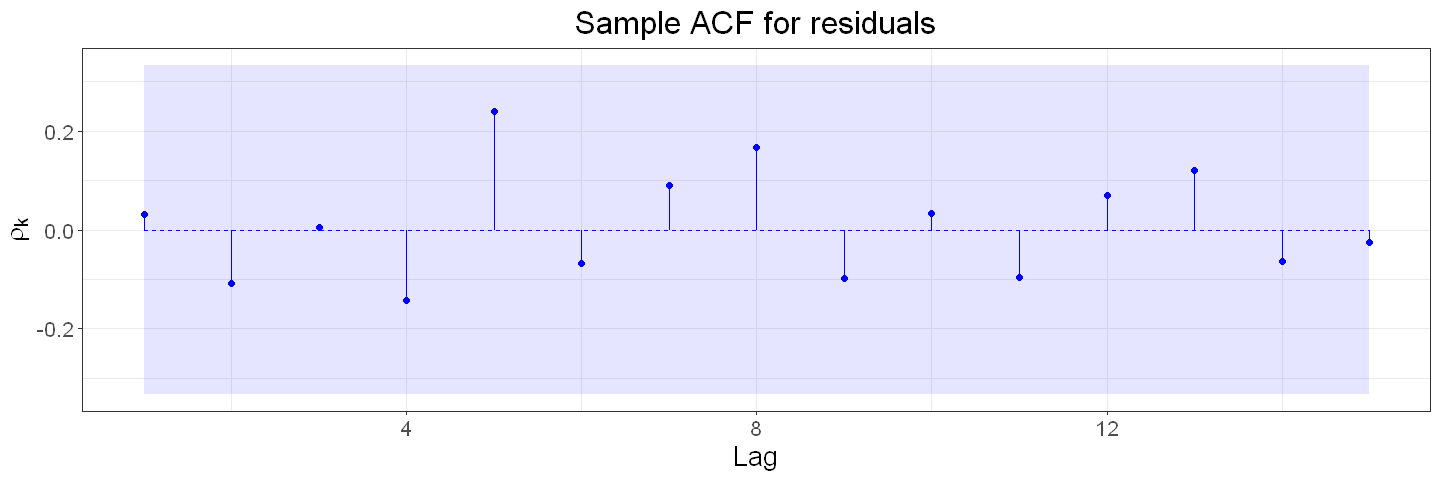

In [18]:
r = acf(model$resid, lag.max=15, plot=F)$acf[-1]
se = 1 / sqrt(length(Y))
plot_acf_with_bounds(r, - 2 * se, + 2*se, title='Sample ACF for residuals')

ACF suggests the residuals are white noise.

**(d)**

In [19]:
ljung.box.test(acf(model$resid, lag.max=6, plot=F)$acf[-1], n=length(Y), k_ma=1)

$`X-squared`
[1] 3.668276

$df
[1] 5

$`p-value`
[1] 0.5980919

The test does not reject randomness of error based on the first 6 autocorrelations.

**Exercise 8.6**.  Simulate an AR(2) model with $n = 48$, $\phi_1 = 1.5$, and $\phi_2 = −0.75$.

**(a)** Fit the correctly specified AR(2) model and look at a time series plot of the residuals.  Does the plot support the AR(2) specification?

**(b)** Display a normal quantile-quantile plot of the standardized residuals.  Does the plot support the AR(2) specification?

**(c)** Display the sample ACF of the residuals.  Does the plot support the AR(2) specification?

**(d)** Calculate the Ljung-Box statistic summing to K = 12.  Does this statistic support the AR(2) specification?

**Solution**.

In [20]:
set.seed(2000)
Y = arima.sim(model=list(ar=c(1.5, -0.75)), n=48)

**(a)**

In [21]:
model = arima(Y, order=c(2,0,0), method='ML')

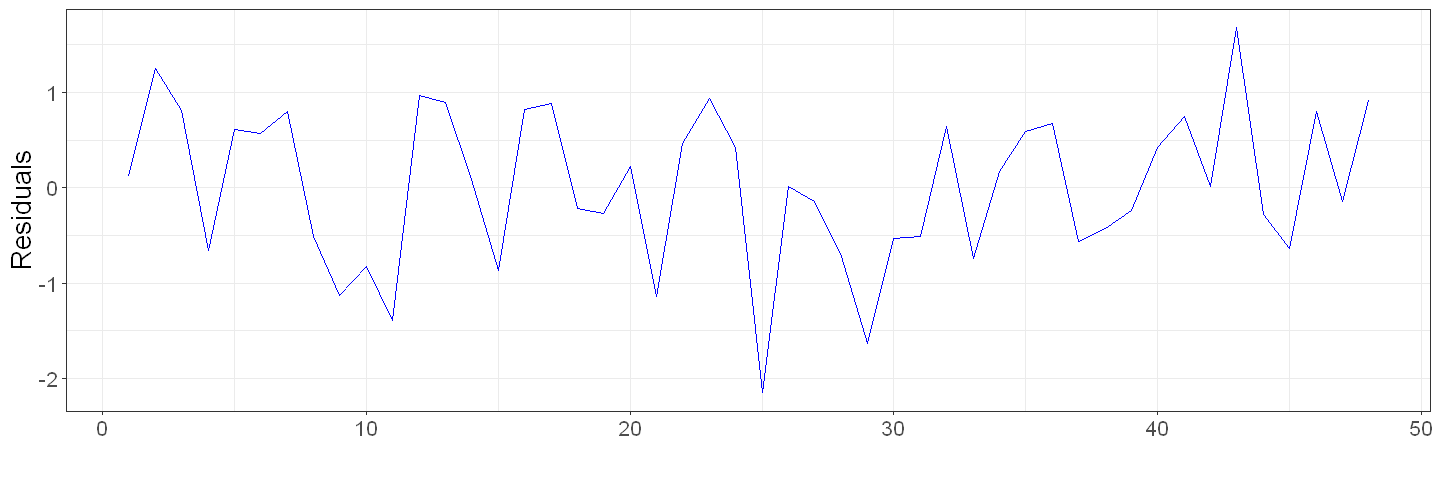

In [22]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() + 
  geom_line(aes(x=1:length(Y), y=c(model$resid)), color='blue', na.rm=T) +
  xlab('') + ylab('Residuals') +
  theme_bw() + theme(text = element_text(size=16))

Residuals look random.

**(b)**

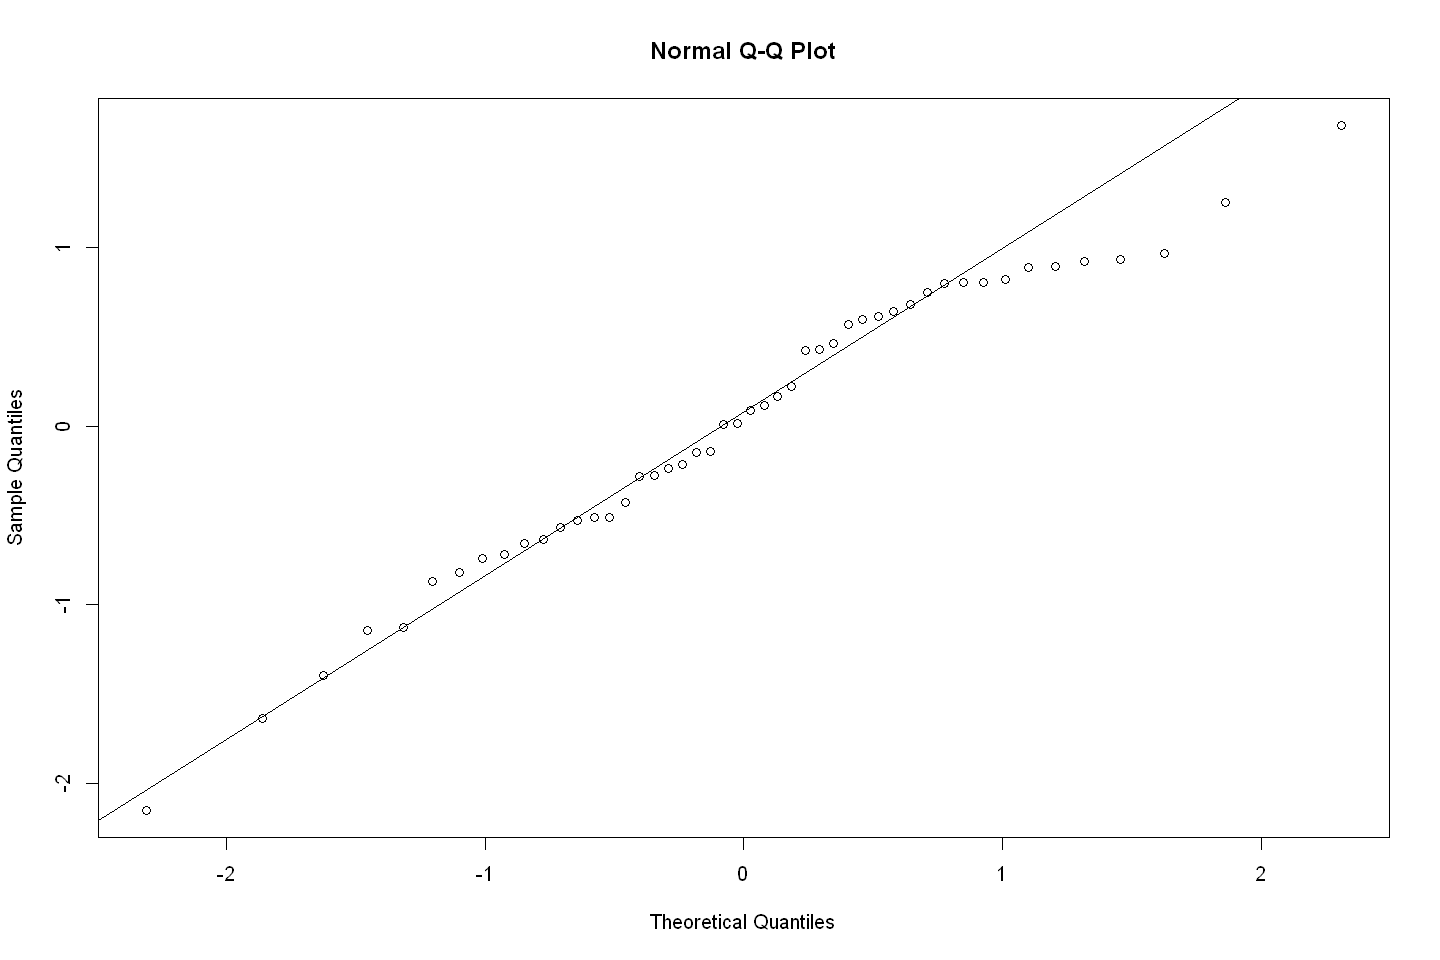

In [23]:
options(repr.plot.width=12, repr.plot.height=8)
qqnorm(model$resid); qqline(model$resid)

The upper tail of the plot looks suspect.  Let's do a Shapiro-Wilk test for normality on the residuals:

In [24]:
shapiro.test(model$resid)


	Shapiro-Wilk normality test

data:  model$resid
W = 0.97261, p-value = 0.3191


The Shapiro-Wilk test fails to reject normality.

**(c)**

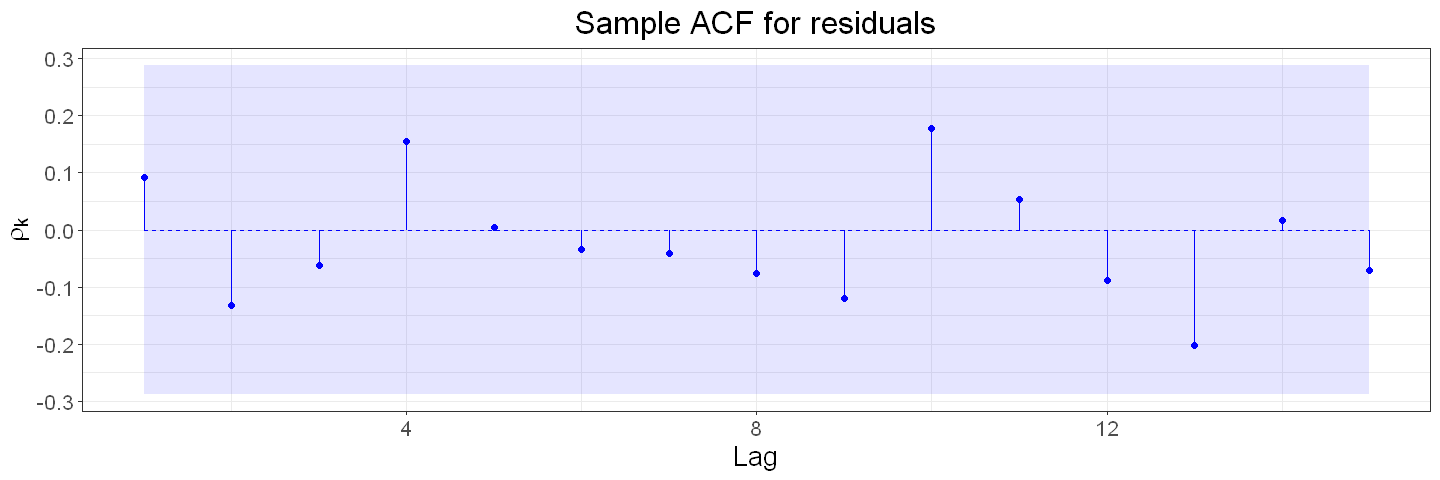

In [25]:
r = acf(model$resid, lag.max=15, plot=F)$acf[-1]
se = 1 / sqrt(length(Y))
plot_acf_with_bounds(r, - 2 * se, + 2*se, title='Sample ACF for residuals')

ACF suggests the residuals are white noise.

**(d)**

In [26]:
ljung.box.test(acf(model$resid, lag.max=12, plot=F)$acf[-1], n=length(Y), k_ar=2)

$`X-squared`
[1] 6.40808

$df
[1] 10

$`p-value`
[1] 0.7798927

The test does not reject randomness of error based on the first 12 autocorrelations.

**Exercise 8.7**.  Fit an AR(3) model by maximum likelihood to the square root of the hare abundance series (filename `hare`).

**(a)** Plot the sample ACF of the residuals. Comment on the size of the correlations.

**(b)** Calculate the Ljung-Box statistic summing to $K = 9$.  Does this statistic support the AR(3) specification?

**(c)** Perform a runs test on the residuals and comment on the results.

**(d)** Display the quantile-quantile normal plot of the residuals. Comment on the plot.

**(e)** Perform the Shapiro-Wilk test of normality on the residuals.

**Solution**.

In [27]:
Y <- read.csv('../data/hare.dat')[['hare']]
model = arima(Y, order=c(3,0,0), method='ML')

**(a)**

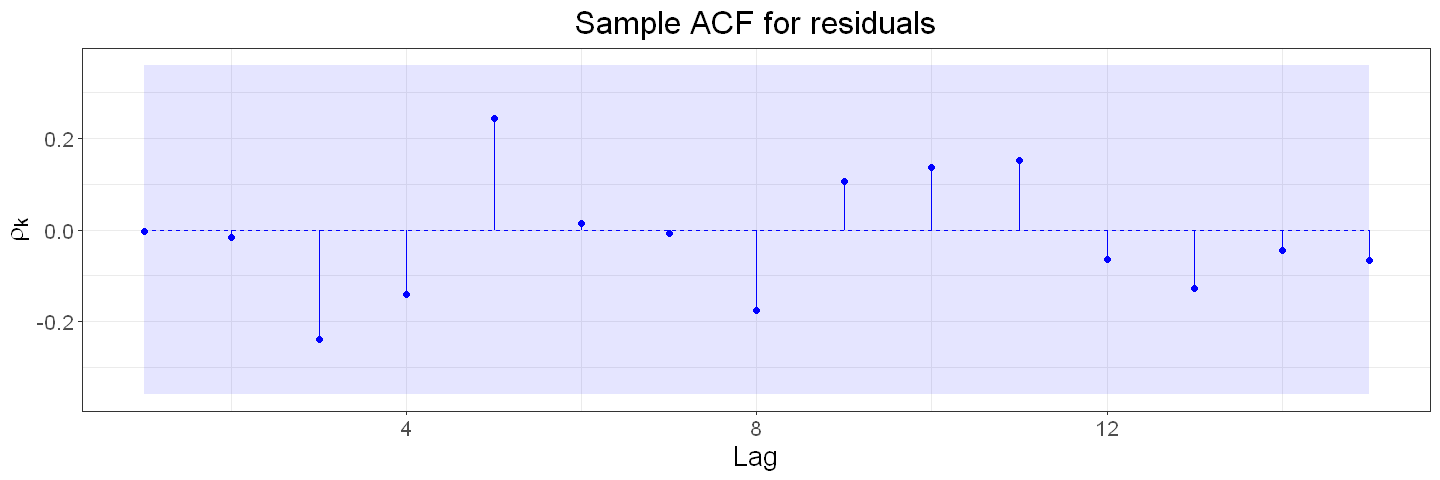

In [28]:
r = acf(model$resid, lag.max=15, plot=F)$acf[-1]
se = 1 / sqrt(length(Y))
plot_acf_with_bounds(r, - 2 * se, + 2*se, title='Sample ACF for residuals')

Autocorrelation on residuals are small, and suggest no significant values.

**(b)**

In [29]:
ljung.box.test(acf(model$resid, lag.max=9, plot=F)$acf[-1], n=length(Y), k_ar=3)

$`X-squared`
[1] 6.211718

$df
[1] 6

$`p-value`
[1] 0.3998962

The statistic supports the specification.

**(c)**

In [30]:
require(tseries)

Loading required package: tseries

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [31]:
runs.test(factor(sign(model$resid - mean(model$resid))))


	Runs Test

data:  factor(sign(model$resid - mean(model$resid)))
Standard Normal = 0.71458, p-value = 0.4749
alternative hypothesis: two.sided


The p-value does not reject independence of terms.

**(d)**

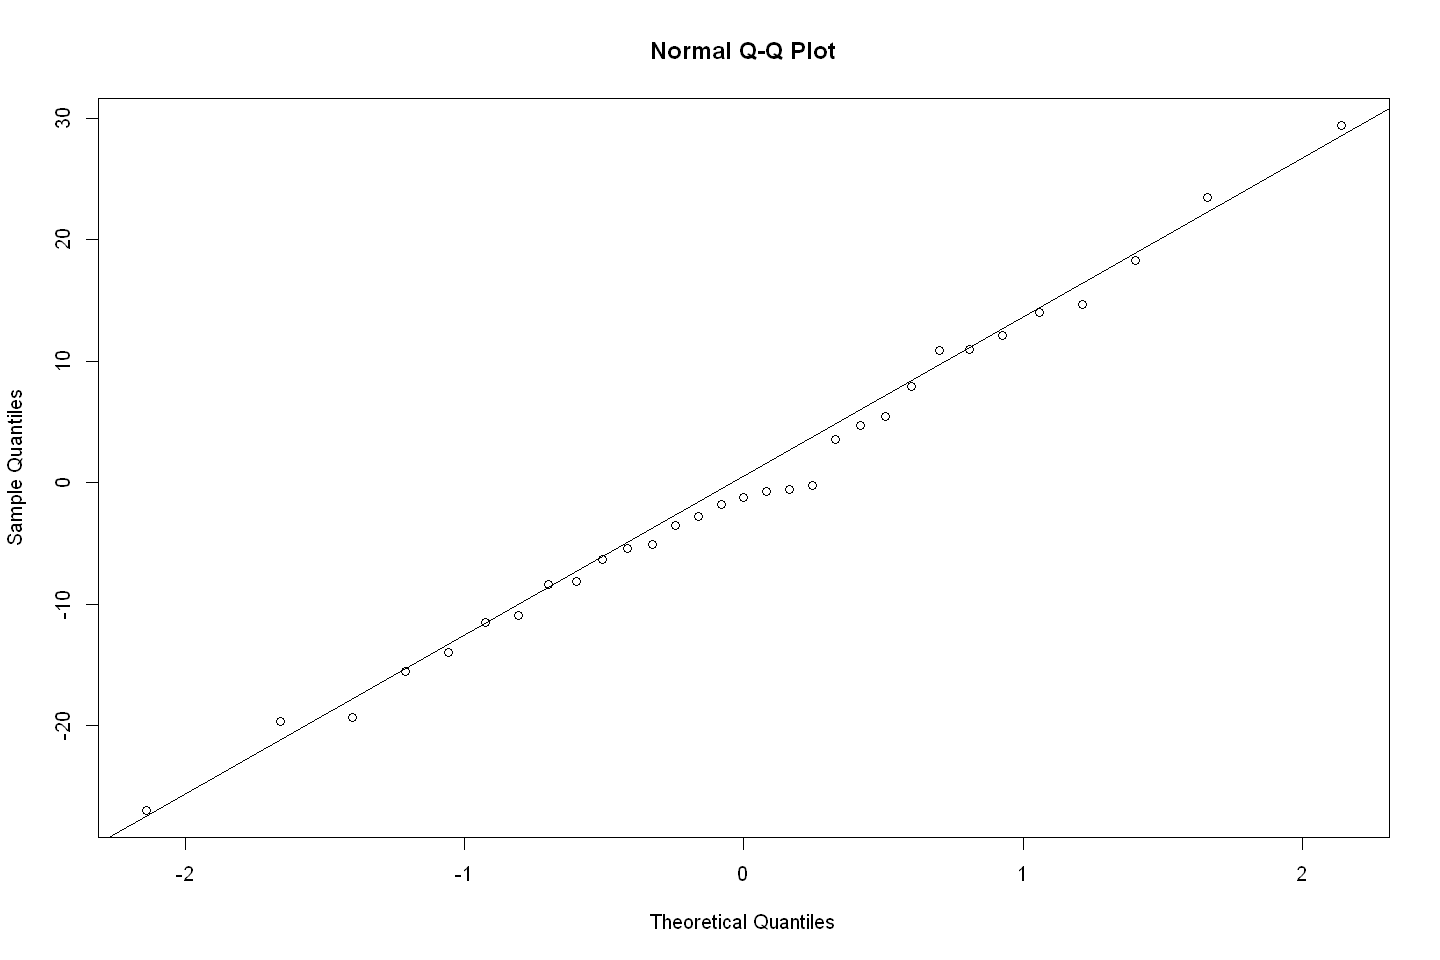

In [32]:
options(repr.plot.width=12, repr.plot.height=8)
qqnorm(model$resid); qqline(model$resid)

Residuals look normal.

**(e)**

In [33]:
shapiro.test(model$resid)


	Shapiro-Wilk normality test

data:  model$resid
W = 0.99068, p-value = 0.9932


Shapiro-Wilk fails to reject normality of residuals.

**Exercise 8.8**.  Consider the oil filter sales data shown in Exhibit 1.8 on page 7.  The data are in the file named `oilfilters`.

**(a)** Fit an AR(1) model to this series. Is the estimate of the $\phi$ parameter significantly different from zero statistically?

**(b)** Display the sample ACF of the residuals from the AR(1) fitted model. Comment on the display.

**Solution**.

In [34]:
Y <- read.csv('../data/oilfilters.dat')[['oilfilters']]
model = arima(Y, order=c(1,0,0), method='ML')
print(model)


Call:
arima(x = Y, order = c(1, 0, 0), method = "ML")

Coefficients:
         ar1  intercept
      0.3115   3370.680
s.e.  0.1368    253.153

sigma^2 estimated as 1482801:  log likelihood = -409.19,  aic = 824.37


Yes -- the estimate for $\phi$ is more than 2 standard errors away from zero.

**(b)**

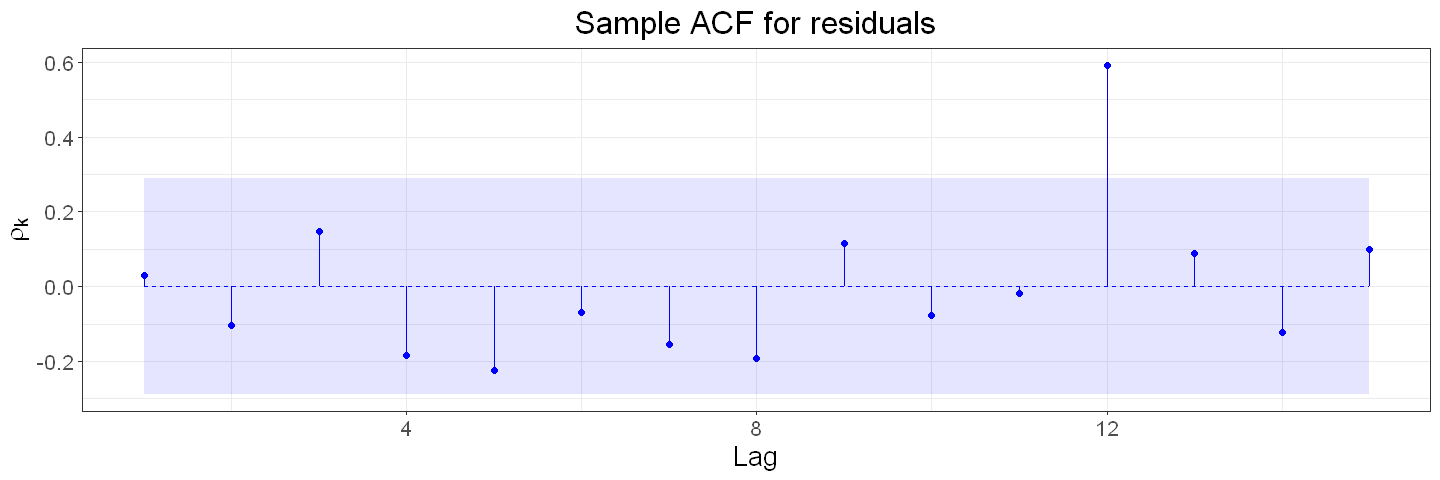

In [35]:
r = acf(model$resid, lag.max=15, plot=F)$acf[-1]
se = 1 / sqrt(length(Y))
plot_acf_with_bounds(r, - 2 * se, + 2*se, title='Sample ACF for residuals')

There is a significant autocorrelation lag at 12. This suggests the series may contain seasonality not captured by the model.

**Exercise 8.9**.  The data file named `robot` contains a time series obtained from an industrial robot.  The robot was put through a sequence of maneuvers, and the distance from a desired ending point was recorded in inches.  This was repeated 324 times to form the time series.  Compare the fits of an AR(1) model and an IMA(1, 1) model for these data in terms of the diagnostic tests discussed in this chapter.

**Solution**.

In [36]:
Y <- read.csv('../data/robot.dat')[['robot']]

In [37]:
model.ar1 = arima(Y, order=c(1,0,0), method='ML')
print(model.ar1)


Call:
arima(x = Y, order = c(1, 0, 0), method = "ML")

Coefficients:
         ar1  intercept
      0.3076     0.0015
s.e.  0.0528     0.0002

sigma^2 estimated as 6.482e-06:  log likelihood = 1475.54,  aic = -2945.08


In [38]:
model.ima11 = arima(Y, order=c(0,1,1), method='ML')
print(model.ima11)


Call:
arima(x = Y, order = c(0, 1, 1), method = "ML")

Coefficients:
          ma1
      -0.8713
s.e.   0.0389

sigma^2 estimated as 6.069e-06:  log likelihood = 1480.95,  aic = -2957.9


Both models have significant estimates for their coefficients. The AIC score for the IMA(1, 1) model is slightly smaller.

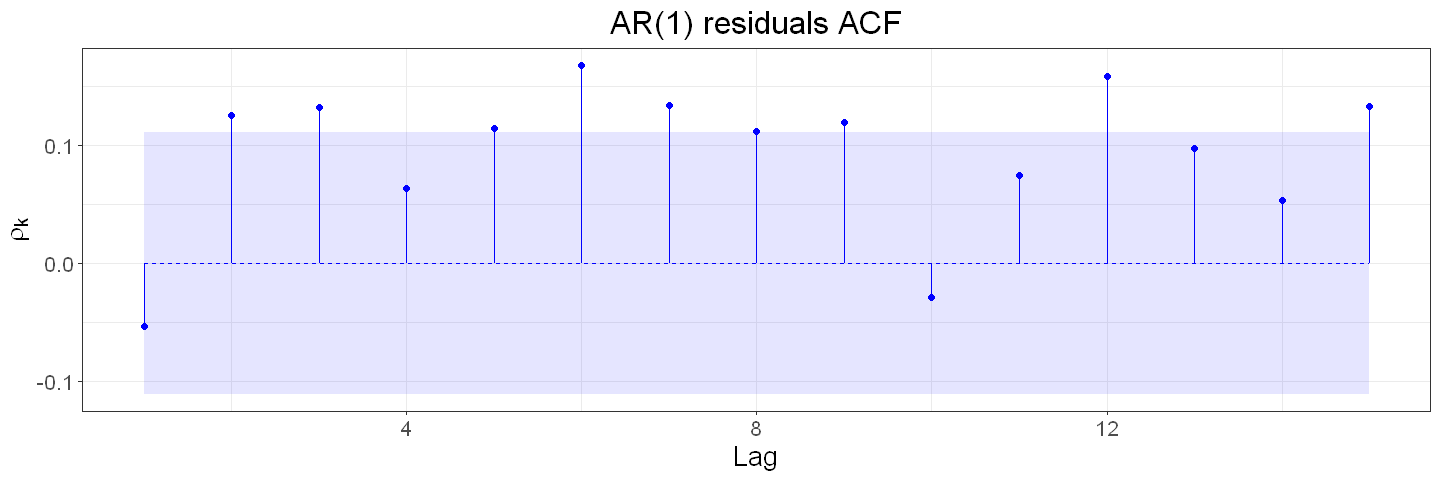

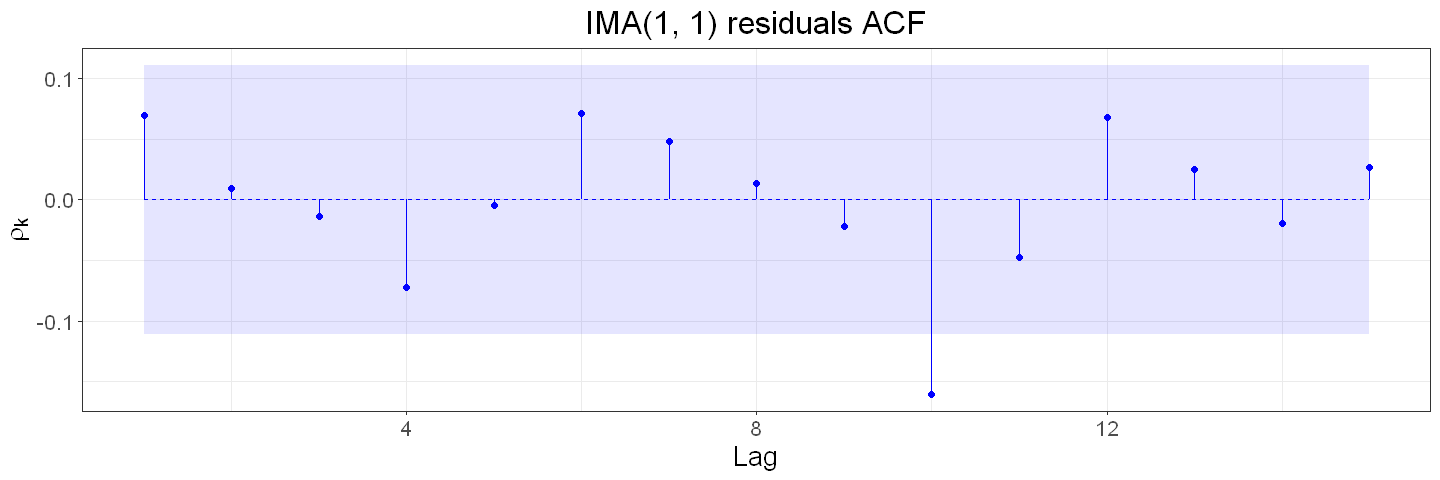

In [39]:
plot_residuals_acf <- function(resid, title, nlags=15) {
    r = acf(resid, lag.max=nlags, plot=F)$acf[-1]
    se = 1 / sqrt(length(resid))
    plot_acf_with_bounds(r, - 2 * se, + 2*se, title=title)
}

plot_residuals_acf(model.ar1$resid, 'AR(1) residuals ACF')
plot_residuals_acf(model.ima11$resid, 'IMA(1, 1) residuals ACF')

The residuals for the AR(1) model have too much autocorrelation; the residuals for the IMA(1, 1) model show too much correlation only at lag 10.

This conclusion is confirmed by the Ljung-Box tests: the AR(1) residuals have, collectively, too much correlation, while the residuals from the IMA(1, 1) fit do not.

In [40]:
ljung.box.test(acf(model.ar1$resid, lag.max=12, plot=F)$acf[-1], n=length(Y), k_ar=1)

$`X-squared`
[1] 51.83309

$df
[1] 11

$`p-value`
[1] 2.922946e-07

In [41]:
ljung.box.test(acf(model.ima11$resid, lag.max=12, plot=F)$acf[-1], n=length(Y), k_ma=1)

$`X-squared`
[1] 16.92107

$df
[1] 11

$`p-value`
[1] 0.1102322

Finally, Shapiro-Wilk test p-values do not reject normality in either of the residuals:

In [42]:
shapiro.test(model.ar1$resid)


	Shapiro-Wilk normality test

data:  model.ar1$resid
W = 0.99758, p-value = 0.9193


In [43]:
shapiro.test(model.ima11$resid)


	Shapiro-Wilk normality test

data:  model.ima11$resid
W = 0.99689, p-value = 0.791


**Exercise 8.10**.  The data file named `deere3` contains 57 consecutive values from a complex machine tool at Deere & Co.  The values given are deviations from a target value in units of ten millionths of an inch.  The process employs a control mechanism
that resets some of the parameters of the machine tool depending on the magnitude of deviation from target of the last item produced.  Diagnose the fit of an AR(1) model for these data in terms of the tests discussed in this chapter.

**Solution**.

In [44]:
Y <- read.csv('../data/deere3.dat')[['deere3']]

In [45]:
model = arima(Y, order=c(1,0,0), method='ML')
print(model)


Call:
arima(x = Y, order = c(1, 0, 0), method = "ML")

Coefficients:
         ar1  intercept
      0.5256   124.3524
s.e.  0.1108   394.2320

sigma^2 estimated as 2069354:  log likelihood = -495.51,  aic = 997.02


Coefficient appears to be significant.

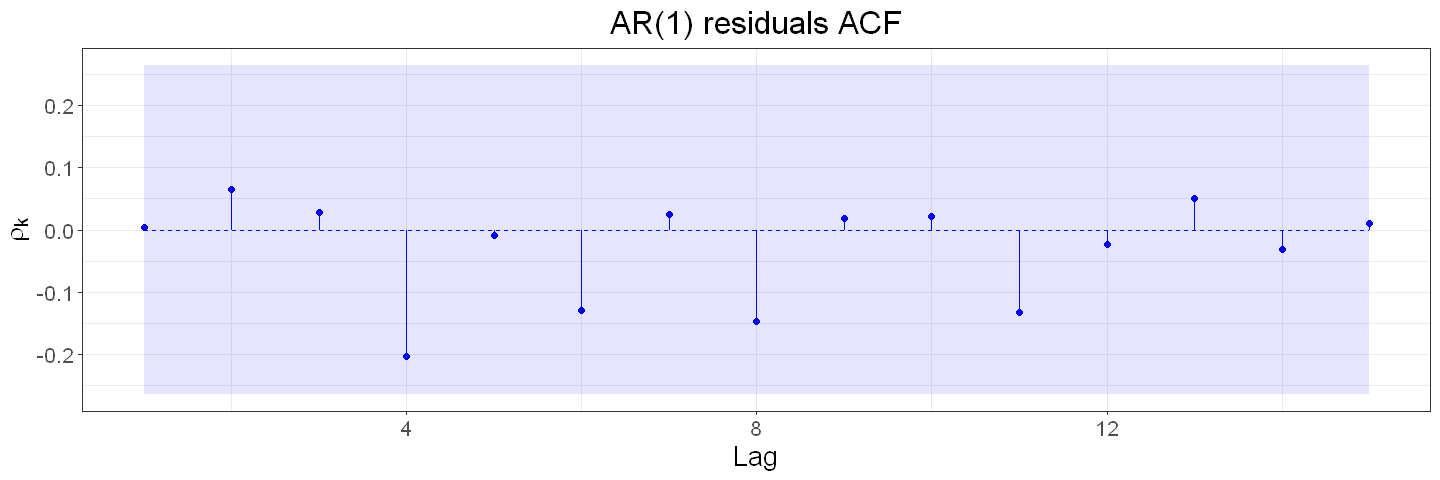

In [46]:
plot_residuals_acf(model$resid, 'AR(1) residuals ACF')

Residuals do not display significant autocorrelation individually.

In [47]:
ljung.box.test(acf(model$resid, lag.max=12, plot=F)$acf[-1], n=length(Y), k_ar=1)

$`X-squared`
[1] 6.486137

$df
[1] 11

$`p-value`
[1] 0.8390418

Residuals do not display significant autocorrelation collectively.

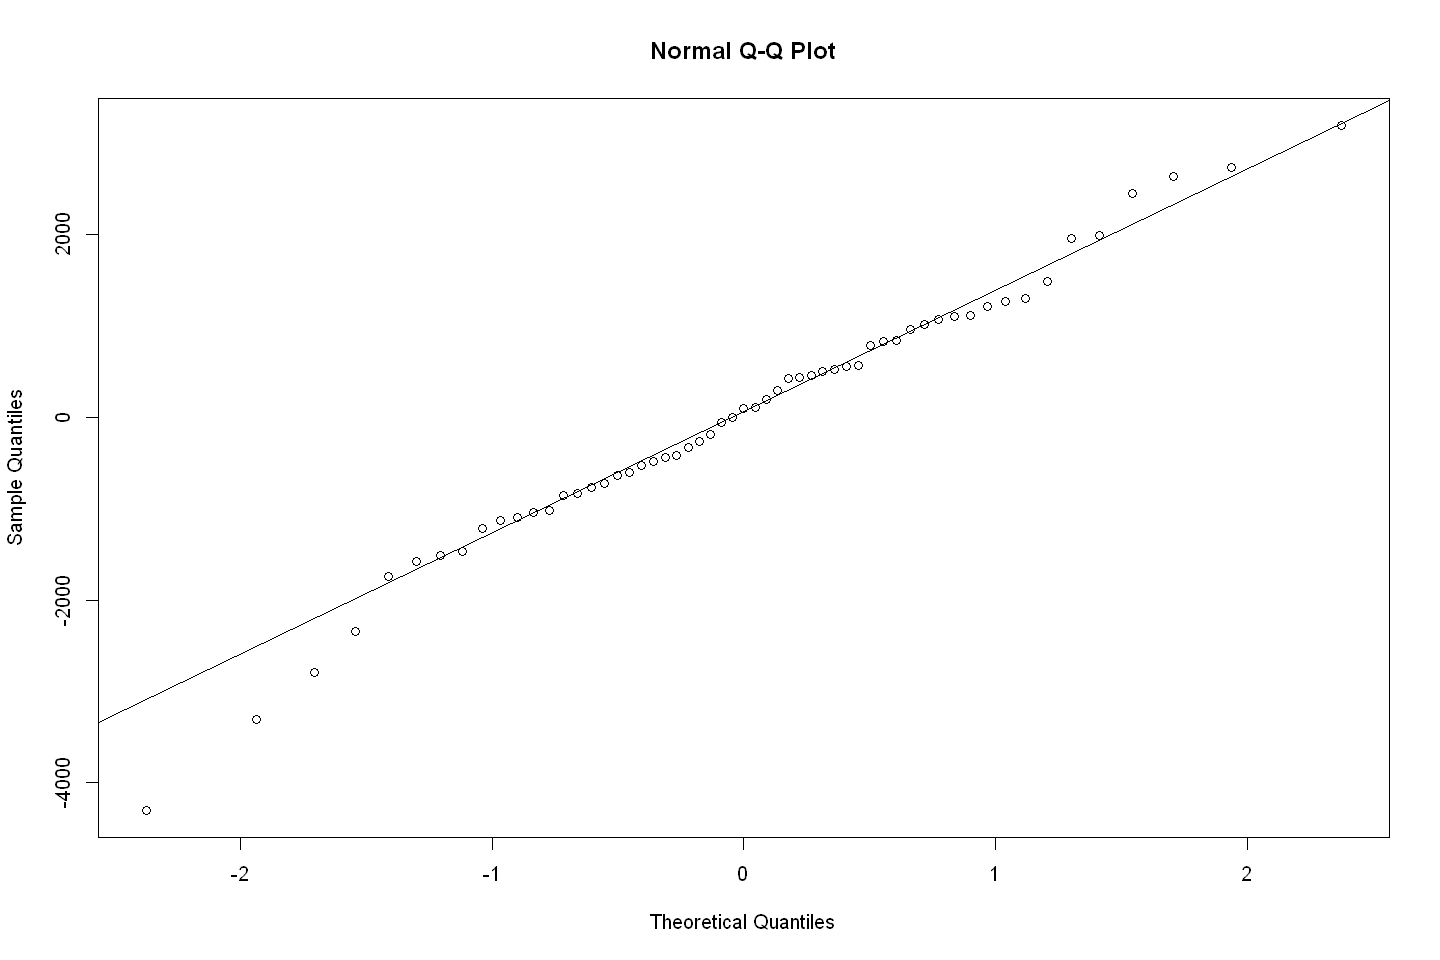

In [48]:
options(repr.plot.width=12, repr.plot.height=8)
qqnorm(model$resid); qqline(model$resid)

Q-Q plot is a bit questionable near the bottom tail.

In [49]:
shapiro.test(model$resid)


	Shapiro-Wilk normality test

data:  model$resid
W = 0.98261, p-value = 0.5827


Shapiro-Wilk does not reject the hypothesis that residuals are normally distributed.